## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
    - William Chen 1400081
    - Petr Andreev 1375858
    - Rafsan Al Mamun 1407776
    - Ojaswi Dheer 1447227

# Lung Disease Analysis in Victoria
---------------------------------
This notebook explores lung disease data collected from SUDO across all of Australia. The dataset includes mortality rates, income levels, employment status, gender etc for asthma and COPD. The objective of this analysis is to gain insights into the relationship of demographics with lung diseases.

## Import Necessary Libraries:
----------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Load the Dataset:
--------------------

There are several datasets for this analysis that contains statistics for lung diseases across various factors.

Before proceeding with the analysis, we will load all the datasets.

In [2]:
# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width

In [21]:
# Load the datasets
male_lung_cancer_data = pd.read_csv('../data/Lung Disease Dataset/aihw_cimar_mortality_males_gccsa_2009.csv')
female_lung_cancer_data = pd.read_csv('../data/Lung Disease Dataset/aihw_cimar_mortality_females_gccsa_2009.csv')
all_lung_cancer_data = pd.read_csv('../data/Lung Disease Dataset/aihw_cimar_mortality_persons_gccsa_2009.csv')
census_by_cob_data = pd.read_csv('../data/Lung Disease Dataset/abs_2021census_g21a_aust_gccsa.csv')
census_by_inc_emp_data = pd.read_csv('../data/Lung Disease Dataset/abs_2021census_g21b_aust_gccsa.csv')

## Summary Statistics:
-----------------
By examining the summary statistics from various angles and considering their implications in the broader context of lung diseases across the country, we can uncover valuable insights and inform evidence-based decision-making.

Here we will visualise the descriptive statistics for asthma and COPD prevalence and the mortality associated with lung cancer.

In [22]:
# Merge mortality and census datasets based on location
merged_data_1 = all_lung_cancer_data.merge(census_by_cob_data, how='inner', on=['gccsa_code', 'gccsa_name'])
merged_data_1.head()

,gccsa_code,gccsa_name,Lung cancer total mortality,Lung cancer population,Lung cancer rate per 100k,All cancer total mortality,All cancer population,Total asthma,Employed asthma,Australian asthma,Total COPD,Australian COPD,Foreigner asthma,Foreigner COPD
0,1GSYD,Greater Sydney,7272,23089361,31.50,39171,23089361,353656,176461,263188,63101,40132,88368,21806
1,1RNSW,Rest of NSW,6513,13043735,49.93,33277,13043735,271403,122833,246105,72543,60438,21667,9994
2,2GMEL,Greater Melbourne,6377,20904141,30.51,35887,20904141,386347,208830,292521,58925,37523,91496,20287
3,2RVIC,Rest of Vic,3138,6834239,45.92,17475,6834239,156014,73533,140299,38195,31287,13405,5734
4,3GBRI,Greater Brisbane,3406,10753623,31.67,18039,10753623,224233,116657,182163,46859,35004,40601,11007


In [23]:
# Display summary stats of chosen columns
merged_data_1[['Total asthma', 'Total COPD', 'Lung cancer total mortality']].describe()

,Total asthma,Total COPD,Lung cancer total mortality
count,15.000000,15.000000,15.000000
mean,137608.066667,29331.933333,2690.866667
std,127839.516274,25478.827755,2505.530536
min,4429.000000,942.000000,137.000000
25%,34008.500000,7573.500000,585.000000
50%,121331.000000,25546.000000,2506.000000
75%,218554.000000,52892.000000,4017.000000
max,386347.000000,72543.000000,7272.000000


### Insights from Summary Statistics:
1. High Variability in Asthma Prevalence:
The diagnosed cases of asthma exhibit significant variability across different locations in Australia. The standard deviation of approximately 127,840 individuals highlights substantial differences in asthma prevalence between regions.

2. Asthma Burden and Disease Impact:
The mean number of diagnosed asthma cases (137,608 individuals) suggests a considerable burden of asthma within the population. This underscores the importance of public health interventions and access to effective asthma management strategies.

3. Comparison with COPD Prevalence:
While COPD has a lower mean prevalence (29,332 individuals) compared to asthma, it still represents a significant health concern with notable variation between locations (std ≈ 25,479 individuals). COPD poses challenges in healthcare delivery and emphasizes the need for targeted prevention and treatment approaches.

4. Geographical Variations:
The wide range of diagnosed cases for both asthma (4,429 to 386,347 individuals) and COPD (942 to 72,543 individuals) reflects geographical disparities in disease prevalence. Understanding regional differences can inform targeted healthcare policies and resource allocation.

5. Public Health Implications:
The distribution analysis, including quartile breakdowns, provides insights into the distribution of disease burden within each category. This information is crucial for prioritizing resources and interventions to address asthma and COPD at local and national levels.

## Exploratory Data Analysis (EDA):
-----------------------------------

### Distribution of Data Across Locations:
Let's plot some pie charts to see the distribution of asthma and COPD prevalence and lung cancer mortality.

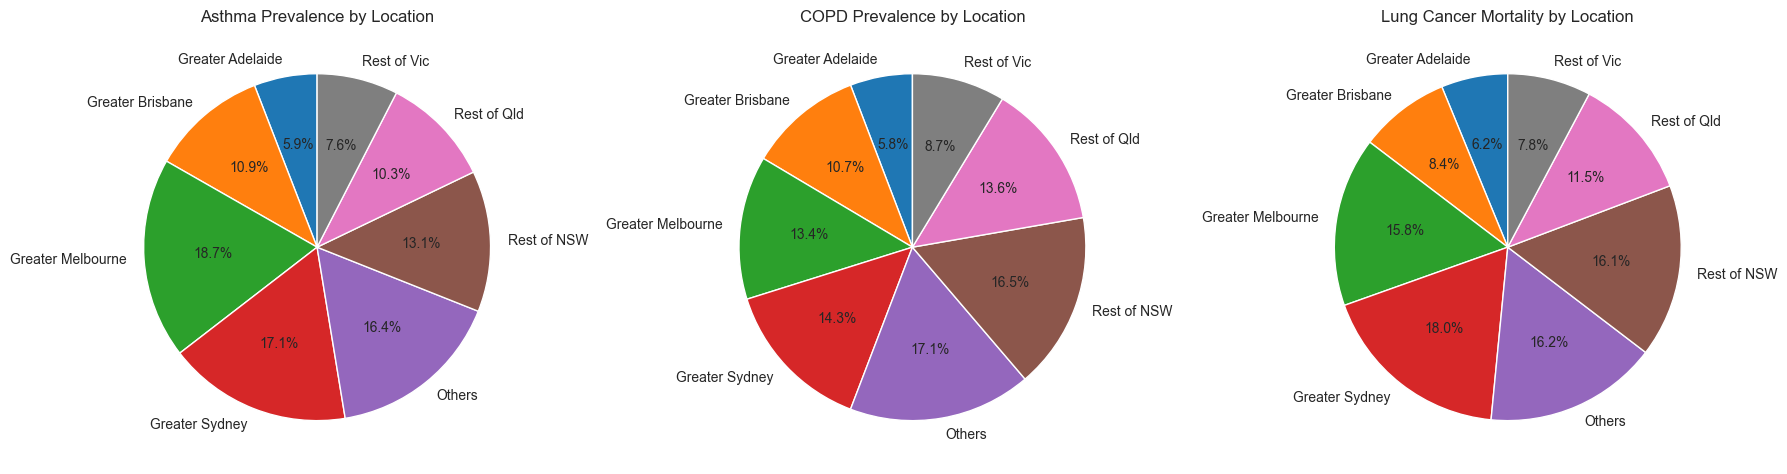

In [41]:
# Major locations
major_locations = ['Greater Melbourne', 'Greater Sydney', 'Greater Brisbane', 'Greater Adelaide', 'Rest of Vic', 'Rest of NSW', 'Rest of Qld']

# Define the aggregation function
def aggregate_locations(location):
    if location in major_locations:
        return location
    else:
        return 'Others'

# Apply the aggregation function to create a new column 'aggregated_location'
merged_data_1.loc[:, 'aggregated_location'] = merged_data_1['gccsa_name'].apply(aggregate_locations)

# Filter data for pie charts (include only major locations and "Others")
filtered_data = merged_data_1.groupby('aggregated_location')[['Total asthma', 'Total COPD', 'Lung cancer total mortality']].sum()

# Create subplots for pie charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))

# Plot pie chart for Asthma prevalence
ax1.pie(filtered_data['Total asthma'], labels=filtered_data.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Asthma Prevalence by Location')

# Plot pie chart for COPD prevalence
ax2.pie(filtered_data['Total COPD'], labels=filtered_data.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('COPD Prevalence by Location')

# Plot pie chart for Lung Cancer mortality
ax3.pie(filtered_data['Lung cancer total mortality'], labels=filtered_data.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('Lung Cancer Mortality by Location')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Insights from Distribution Charts:

1. Urban Air Quality and Environmental Factors:
- Higher Pollution Levels in Urban Centers: Major cities like Greater Sydney (17.1% asthma, 14.3% COPD) and Greater Melbourne (18.7% asthma, 13.4% COPD) experience elevated levels of air pollution due to industrial activities and vehicular emissions. Poor air quality can exacerbate respiratory conditions, leading to higher prevalence rates compared to regional areas with cleaner air.
- Impact of Geographic Features: Coastal cities such as Greater Brisbane (10.9% asthma, 10.7% COPD) may benefit from milder climates and lower levels of pollution, contributing to relatively lower prevalence rates compared to inland cities.

2. Population Density and Lifestyle Factors:
- Urban Lifestyle and Health Impacts: Urban residents often face sedentary lifestyles, higher stress levels, and dietary habits that can contribute to respiratory issues. The higher population density in major cities may also increase the spread of respiratory infections, influencing disease prevalence.
- Healthcare Access and Awareness: Major cities like Greater Sydney and Greater Melbourne have better access to healthcare services and resources, resulting in higher diagnosis rates of respiratory conditions. Increased awareness and proactive healthcare-seeking behaviors contribute to higher reported prevalence rates.

3. Climate and Weather Conditions:
- Allergens and Seasonal Patterns: Differences in allergen exposure and seasonal variations can affect asthma prevalence. Regions with specific allergen profiles or seasonal triggers may experience higher rates of asthma.

4. Demographic and Socioeconomic Factors:
- Population Age and Socioeconomic Status: Regions with older populations or lower socioeconomic status (e.g., Rest of NSW - 13.1% asthma, 16.5% COPD) may exhibit higher prevalence rates due to factors such as smoking rates and occupational exposures.
- Rural Health Challenges: Regional areas face challenges related to healthcare access and infrastructure, impacting disease detection and management.